In [1]:
import pandas as pd
import numpy as np

In [28]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [29]:
df = pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [30]:
df.dropna(inplace=True)

In [31]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
df.shape

(714, 3)

In [33]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [34]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
X_train

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250


In [38]:
X_test

,Age,Fare
149,42.0,13.0000
407,3.0,18.7500
53,29.0,26.0000
369,24.0,69.3000
818,43.0,6.4500
...,...,...
819,10.0,27.9000
164,1.0,39.6875
363,35.0,7.0500
56,21.0,10.5000


In [39]:
y_train

328    1
73     0
253    0
719    0
666    0
      ..
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 571, dtype: int64

In [40]:
y_test

149    0
407    1
53     1
369    1
818    0
      ..
819    0
164    0
363    0
56     1
136    1
Name: Survived, Length: 143, dtype: int64

In [46]:
clf = DecisionTreeClassifier()

In [47]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [49]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6275234741784038

In [50]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [51]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [52]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [53]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [59]:
trf.named_transformers_['second'].bin_edges_[0].tolist()

[0.0,
 7.25,
 7.775,
 7.8958,
 8.1583,
 10.5,
 13.0,
 14.4542,
 18.75,
 26.0,
 26.55,
 31.275,
 51.4792,
 76.2917,
 108.90000000000023,
 512.3292]

In [55]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [56]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [57]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
341,24.0,5.0,263.0000,14.0,"(23.0, 25.0]","(108.9, 512.329]"
699,42.0,12.0,7.6500,1.0,"(38.0, 42.0]","(7.25, 7.775]"
120,21.0,4.0,73.5000,12.0,"(19.0, 21.0]","(51.479, 76.292]"
96,71.0,14.0,34.6542,11.0,"(54.0, 80.0]","(31.275, 51.479]"
651,18.0,2.0,23.0000,8.0,"(16.0, 19.0]","(18.75, 26.0]"


In [60]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [61]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [62]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.6330790297339592

In [63]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

C:\Users\aryas\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\aryas\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\aryas\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\aryas\miniconda3\envs\myenv\Lib\site-packages\skl

0.6274843505477309


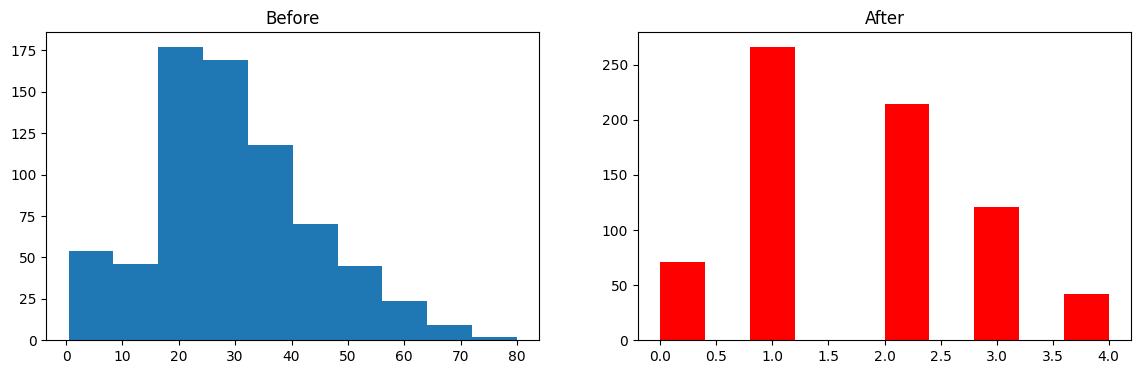

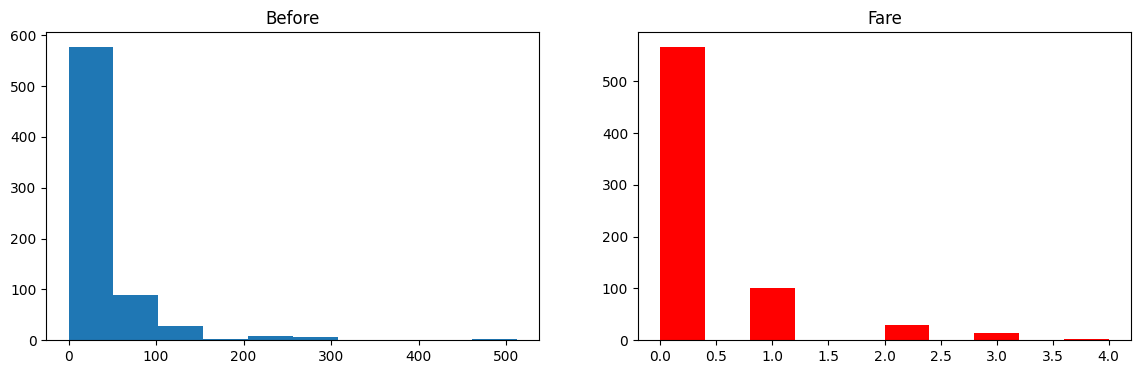

In [64]:
discretize(5,'kmeans')

0.6317292644757433


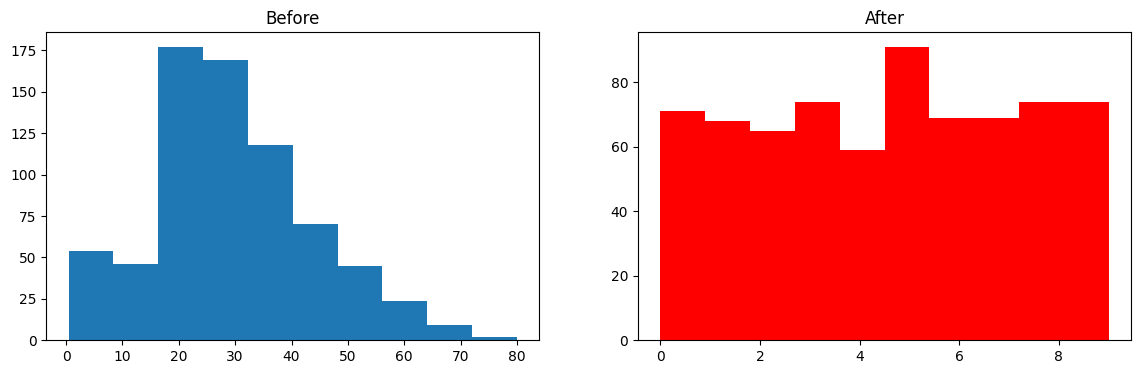

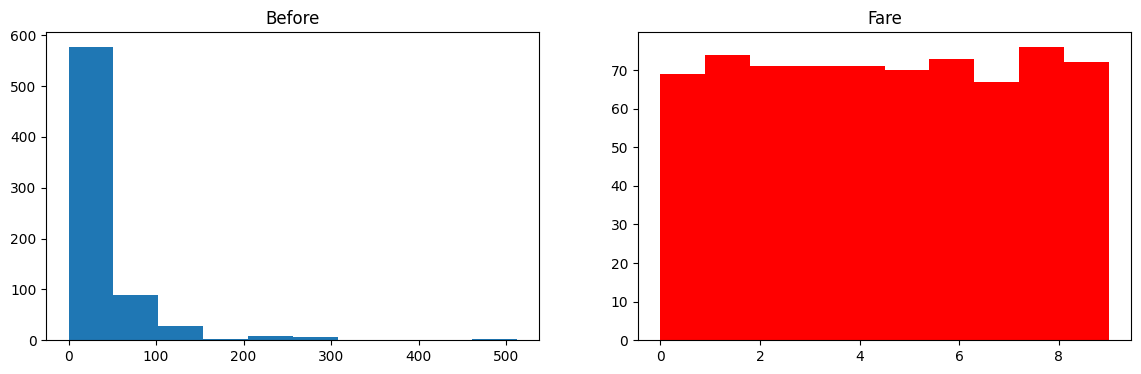

In [65]:
discretize(10,'quantile')

In [69]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [72]:
r2_score(y_test,y_pred)

-0.00725299124736134

In [73]:
lr = LinearRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

In [74]:
r2_score(y_test,y_pred2)

-0.5262725779967161

In [79]:
df1 = pd.read_csv('Titanic-Dataset.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [83]:
df1.dropna(inplace=True)

In [84]:
df1.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [85]:
df1['family'] = df1['SibSp'] + df1['Parch']

In [87]:
df1.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [88]:
df1.drop(columns=['SibSp','Parch'],inplace=True)

In [89]:
df1.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [98]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [101]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6345266040688575

In [102]:
from sklearn.preprocessing import Binarizer

In [103]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [104]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

ValueError: A given column is not a column of the dataframe

In [105]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

ValueError: Shape of passed values is (571, 2), indices imply (571, 3)